<a href="https://colab.research.google.com/github/rocio-perez-sbarato/CBTE/blob/main/Carga_de_precios_%2B_C%C3%A1lculos_de_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Canasta Básica Total Estudiantil  
## Estudiar hoy
### Costos y estrategias para el ingreso y permanencia en la Facultad de Ciencias Sociales


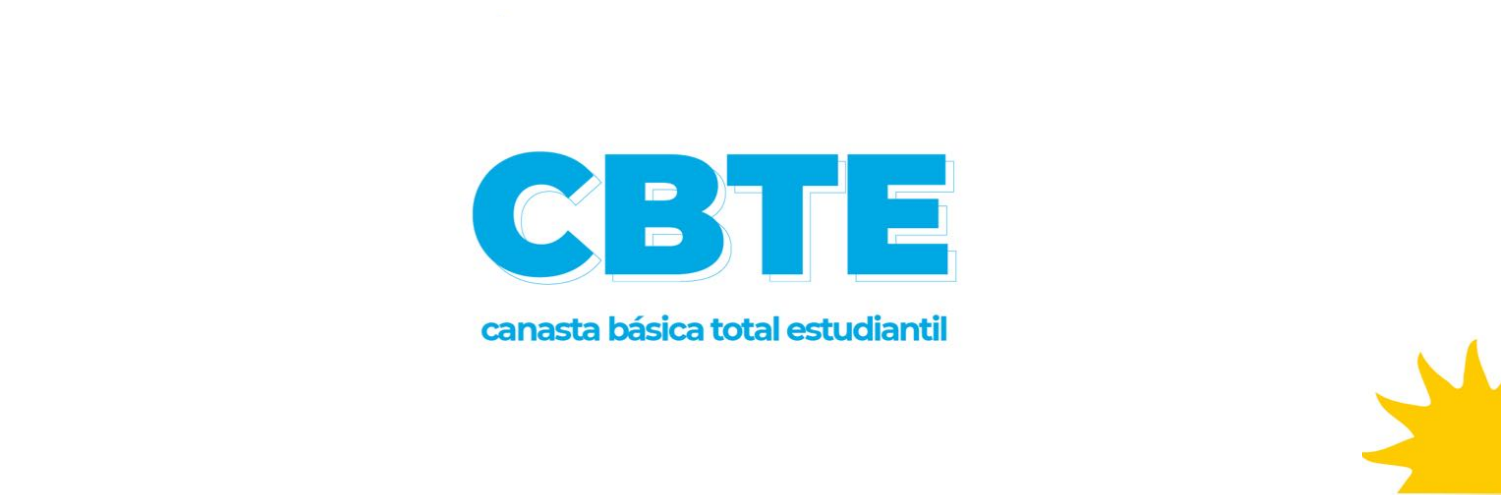

## Integrantes del equipo autogestivo de investigación

Acotto Julián Fernando (Estudiante de la Licenciatura en Sociología, FCS, UNC), Caviglia Morán Lucrecia Angela (Estudiante de la Licenciatura en Ciencia Política, FCS, UNC), Demarco Tomás Ezequiel (Estudiante de la Licenciatura en Ciencia Política, FCS, UNC), Escalonilla Rodrigo Gabriel (Estudiante de la Licenciatura en Sociología, FCS, UNC), Galindez Solana (Estudiante de la Licenciatura en Ciencia Política, FCS, UNC), Giletta Antonella Giuliana (Estudiante de la Licenciatura en Sociología, FCS, UNC y de Abogacía, FD, UNC), Gómez Maia Soledad (Estudiante de la Licenciatura en Ciencia Política, FCS, UNC), Grigioni Lautaro (Estudiante de la Licenciatura en Ciencia Política, FCS, UNC), Moiguer Solana Mailen (Estudiante de la Licenciatura en Ciencia Política, FCS, UNC), Montrucchio Fiorella (Estudiante de la Licenciatura en Ciencia Política, FCS, UNC) y Perez Sbarato Rocío (Estudiante de la Licenciatura en Ciencias de la Computación, FAMAF, UNC).

> 🔗 Repositorio del proyecto: [github.com/rocio-perez-sbarato/CBTE](https://github.com/rocio-perez-sbarato/CBTE)


## Descripción

Este notebook sirve como un paso previo a los cálculos completos para estimar el costo mensual de una **canasta básica para estudiantes universitarios de la Universidad Nacional de Córdoba**, a partir de excels con precios scrapeados y criterios de consumo mínimo. Contiene la construcción de la planilla de excel con la que luego se realizan los cálculos requeridos. También están algunos de estos cálculos en este notebook, pueden probar cargar los datos y descubrir cosas sobre precios en Córdoba o de Python (no olviden hacer una copia en ese caso).

---

## Dependencias

Este cuaderno está diseñado para ejecutarse en Google Colab y utiliza únicamente bibliotecas estándar (`pandas`, `xlsxwriter`, `os`).  
Se instalarán automáticamente en la siguiente celda.

---

## Estructura del notebook

1. Carga y exportación de precios
2. Cálculo de alquiler
3. Cálculo de internet
4. Cálculo de telefonía
5. Cálculo de librería
6. Exportación de promedios

---

## 🧭 Instrucciones de uso

El código está pensado para que cualquier persona del equipo pueda correr este notebook en su compu. Teniendo acceso al drive del proyecto, esto debería andar sin ningún problema. Ahora bien, si este notebook llega a manos de alguien sin acceso a dicha carpeta, debe cambiar un par de cosas en Carga de datos y Exportación de datos, tales detalles no se encuentran explicados en este notebook. Este [link](https://neptune.ai/blog/google-colab-dealing-with-files) puede servir

0. Ejecutar el script en el repo, ya sea si seguís el camino de guardar localmente los datos o subirlos automáticamente a drive

Si tenés los archivos en drive ---> la forma más directa
1. Actualizar los paths de las carpetas de drive y nombres de archivos en Carga de datos y Exportación de datos
2. Entorno de ejecución > Ejecutar todo

Si tenés los archivos en tu compu
1. Subir la carpeta data a este colab
2. Actualizar los paths de las carpetas de drive y los nombres de archivos en Carga de datos y Exportación de datos
3. Entorno de ejecución > Ejecutar todo

## Dependencias

In [ ]:
# @title
import pandas as pd
import os
from google.colab import drive
!pip install xlsxwriter
import xlsxwriter
from datetime import datetime
from openpyxl import load_workbook
from openpyxl.styles import Font, PatternFill

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 7.2 MB/s eta 0:00:00


Montamos el drive 🏄 aceptá todo lo que te pida

In [ ]:
# @title
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Verificamos en qué carpeta están los archivos

**Recomendación**: hacer un acceso directo de la carpeta compartida del proyecto a Mi Unidad en drive, así podés poner ese path para conectar este archivo Google Colab a esa carpeta de drive. Fuente: https://stackoverflow.com/questions/54351852/accessing-shared-with-me-with-colab
- Esto es porque si no sos dueño de la carpeta, entonces Google no te deja accederla. Por eso el acceso directo lo soluciona

In [ ]:
!ls "/content/drive/MyDrive/Canasta_Scraping de precios/scraping_17-07-2025"

alquileres  libreria			      supermercados
internet    registro_scraping_17-07-2025.log  telefonia


# Carga y exportación de precios

⚠ **Cambiar nombre de carpeta y archivos**

**Personalizar el path de la ubicación de tu carpeta de drive**

Definimos la fecha de nuestro análisis de datos, puede ser ingresada a mano con formato día-mes-año o usando la función `datetime.today()` que te da el día de hoy



### Fecha y rutas a subcarpetas

In [ ]:
# Descomentar y ejecutar esta celda si preferis ingresar la fecha
#fecha = d-m-a

In [ ]:
# Si preferís usar la fecha automática, ejecutar esta celda
fecha = datetime.today().strftime("%d-%m-%Y")

In [ ]:
ruta_alquileres = f"/content/drive/MyDrive/Canasta_Scraping de precios/scraping_{fecha}/alquileres"
ruta_internet = f"/content/drive/MyDrive/Canasta_Scraping de precios/scraping_{fecha}/internet"
ruta_telefonia = f"/content/drive/MyDrive/Canasta_Scraping de precios/scraping_{fecha}/telefonia"
ruta_libreria = f"/content/drive/MyDrive/Canasta_Scraping de precios/scraping_{fecha}/libreria"
ruta_supers = f"/content/drive/MyDrive/Canasta_Scraping de precios/scraping_{fecha}/supermercados"

Función auxiliar para chequear la correcta carga de datos

In [ ]:
# @title
def cargar_excel(ruta):
    try:
        df = pd.read_excel(ruta)
        print(f"Archivo cargado: {ruta}")
        return df
    except FileNotFoundError:
        print(f"Archivo no encontrado: {ruta}")
    except ValueError as e:
        print(f"Error de formato en {ruta}: {e}")
    except Exception as e:
        print(f"Error inesperado en {ruta}: {e}")
    return None


### Alquiler

In [ ]:
# @title
if os.path.exists(ruta_alquileres):
    os.chdir(ruta_alquileres)
else:
    print("La ruta de alquileres no existe.") # por si salió mal el scraping

In [ ]:
# @title
#archivo_argenprop = f"argenprop/departamentos_alquiler_cordoba-arg_2-ambientes_1-dormitorio_{fecha}.xlsx"
archivo_argenprop = "argenprop/departamentos_alquiler_cordoba-arg_2-ambientes_1-dormitorio_08-07-2025.xlsx"
argenprop = cargar_excel(archivo_argenprop)

archivo_lavoz = f"lavoz/inmuebles_departamentos_alquileres_1-dormitorio_08-07-2025.xlsx"
lavoz = cargar_excel(archivo_lavoz)

Archivo cargado: argenprop/departamentos_alquiler_cordoba-arg_2-ambientes_1-dormitorio_08-07-2025.xlsx
Archivo cargado: lavoz/inmuebles_departamentos_alquileres_1-dormitorio_08-07-2025.xlsx


### Internet

In [ ]:
# @title
if os.path.exists(ruta_internet):
    os.chdir(ruta_internet)
else:
    print("La ruta de internet no existe.")

In [ ]:
# @title
archivo_internet = f"servicios_internet_14-07-2025.xlsx"
internet = cargar_excel(archivo_internet)

Archivo cargado: servicios_internet_14-07-2025.xlsx


### Telefonia

In [ ]:
# @title
if os.path.exists(ruta_telefonia):
    os.chdir(ruta_telefonia)
else:
    print("La ruta de telefonia no existe.")

In [ ]:
# @title
archivo_telefonia = f"servicios_telefonia_13-07-2025.xlsx"
telefonia = cargar_excel(archivo_telefonia)

Archivo cargado: servicios_telefonia_13-07-2025.xlsx


### Libreria

In [ ]:
# @title
if os.path.exists(ruta_libreria):
    os.chdir(ruta_libreria)
else:
    print("La ruta de libreria no existe.")

In [ ]:
# @title
archivo_lapices_ferniplast = f"ferniplast/libreria_escritura_lapices-negros_08-07-2025.xlsx"
ferniplast_lapices = cargar_excel(archivo_lapices_ferniplast)

archivo_lapices_grafitti = f"grafitti/artistica_lapices_08-07-2025.xlsx"
grafitti_lapices = cargar_excel(archivo_lapices_grafitti)

archivo_lapices_pencilbag = f"pencilbag/escritura1_lapices-grafito_08-07-2025.xlsx"
pencilbag_lapices = cargar_excel(archivo_lapices_pencilbag)
#####

archivo_lapiceras_ferniplast = f"ferniplast/libreria_escritura_boligrafos_08-07-2025.xlsx"
ferniplast_lapiceras = cargar_excel(archivo_lapiceras_ferniplast)

archivo_lapiceras_pencilbag = f"pencilbag/escritura1_boligrafos_clasicos_08-07-2025.xlsx"
pencilbag_lapiceras = cargar_excel(archivo_lapiceras_pencilbag)

archivo_lapiceras_grafitti = f"grafitti/libreria-escolar_escritura1_lapiceras-y-boligrafos_08-07-2025.xlsx"
grafitti_lapiceras = cargar_excel(archivo_lapiceras_grafitti)

#####

archivo_gomas_ferniplast = f"ferniplast/libreria_escritura_gomas-de-borrar_08-07-2025.xlsx"
ferniplast_gomas = cargar_excel(archivo_gomas_ferniplast)

archivo_gomas_pencilpag = f"pencilbag/gomas_08-07-2025.xlsx"
pencilpag_gomas = cargar_excel(archivo_gomas_pencilpag)

archivo_gomas_grafitti = f"grafitti/libreria-escolar_gomas1_08-07-2025.xlsx"
grafitti_gomas = cargar_excel(archivo_gomas_grafitti)

#####

archivo_resaltadores_ferniplast = f"ferniplast/libreria_marcadores-y-resaltadores_08-07-2025.xlsx"
ferniplast_resaltadores = cargar_excel(archivo_resaltadores_ferniplast)

archivo_resaltadores_pencilpag = f"pencilbag/escritura1_resaltadores1_08-07-2025.xlsx"
pencilpag_resaltadores = cargar_excel(archivo_resaltadores_pencilpag)

archivo_resaltadores_grafitti = f"grafitti/libreria-escolar_escritura1_fibras-y-marcadores_08-07-2025.xlsx"
grafitti_resaltadores = cargar_excel(archivo_resaltadores_grafitti)

Archivo cargado: ferniplast/libreria_escritura_lapices-negros_08-07-2025.xlsx
Archivo cargado: grafitti/artistica_lapices_08-07-2025.xlsx
Archivo cargado: pencilbag/escritura1_lapices-grafito_08-07-2025.xlsx
Archivo cargado: ferniplast/libreria_escritura_boligrafos_08-07-2025.xlsx
Archivo cargado: pencilbag/escritura1_boligrafos_clasicos_08-07-2025.xlsx
Archivo cargado: grafitti/libreria-escolar_escritura1_lapiceras-y-boligrafos_08-07-2025.xlsx
Archivo cargado: ferniplast/libreria_escritura_gomas-de-borrar_08-07-2025.xlsx
Archivo cargado: pencilbag/gomas_08-07-2025.xlsx
Archivo cargado: grafitti/libreria-escolar_gomas1_08-07-2025.xlsx
Archivo cargado: ferniplast/libreria_marcadores-y-resaltadores_08-07-2025.xlsx
Archivo cargado: pencilbag/escritura1_resaltadores1_08-07-2025.xlsx
Archivo cargado: grafitti/libreria-escolar_escritura1_fibras-y-marcadores_08-07-2025.xlsx


In [ ]:
# Hacemos un df con todos los datos de cada libreria (ferniplast, grafitti, pencilbag)
df_ferniplast = pd.concat([ferniplast_lapices, ferniplast_lapiceras, ferniplast_gomas, ferniplast_resaltadores], ignore_index=True)
df_grafitti = pd.concat([grafitti_lapices, grafitti_lapiceras, grafitti_gomas, grafitti_resaltadores], ignore_index=True )
df_pencilbag = pd.concat([pencilbag_lapices, pencilbag_lapiceras, pencilpag_gomas, pencilpag_resaltadores], ignore_index=True)

# filtramos cada nuevo df (en todos Tiene oferta == No)
df_ferniplast = df_ferniplast[df_ferniplast["Tiene oferta"] == "No"]
df_grafitti = df_grafitti[df_grafitti["Tiene oferta"] == "No"]
df_pencilbag = df_pencilbag[df_pencilbag["Tiene oferta"] == "No"]

# Tomo la columna de Producto, Precio
df_ferniplast = df_ferniplast[["Nombre del producto", "Precio final"]]
df_grafitti = df_grafitti[["Nombre del producto", "Precio final"]]
df_pencilbag = df_pencilbag[["Nombre del producto", "Precio final"]]

### Supers

In [ ]:
# construyo las rutas con ruta_supers concatenada a supermercados_vea, etc...
ruta_vea = ruta_supers + "/vea"
ruta_carrefour = ruta_supers + "/carrefour"
ruta_disco = ruta_supers + "/disco"
ruta_exportar = f"/content/drive/MyDrive/CBTE/Scraping de precios/scraping_{fecha}"
os.chdir(ruta_exportar)

In [ ]:
productos_carrefour = []

# Recorrer todos los archivos de la carpeta
for archivo in os.listdir(ruta_carrefour):
    if archivo.endswith('.xlsx'):
        ruta_completa = os.path.join(ruta_carrefour, archivo)
        try:
            producto_carrefour = pd.read_excel(ruta_completa)
            # Filtrar por "Tiene oferta" == "No"
            producto_carrefour_filtrado = producto_carrefour[producto_carrefour['Tiene oferta'] == 'No']
            # Tomo la columna de Producto, Precio x kg/lt
            producto_carrefour_filtrado = producto_carrefour_filtrado[['Producto', 'Precio x kg/lt']]
            productos_carrefour.append(producto_carrefour_filtrado)
        except Exception as e:
            print(f'Error al procesar {archivo}: {e}')

# Unir todos los DataFrames en uno solo
carrefour_total = pd.concat(productos_carrefour, ignore_index=True)

In [ ]:
productos_vea = []

# Recorrer todos los archivos de la carpeta
for archivo in os.listdir(ruta_vea):
    if archivo.endswith('.xlsx'):
        ruta_completa = os.path.join(ruta_vea, archivo)
        try:
            producto_vea = pd.read_excel(ruta_completa)
            # Filtrar por "Tiene oferta" == "No"
            producto_vea_filtrado = producto_vea[producto_vea['Tiene oferta'] == 'No']
            # Tomo la columna de Producto, Precio x kg/lt
            producto_vea_filtrado = producto_vea_filtrado[['Producto', 'Precio x kg/lt']]
            productos_vea.append(producto_vea_filtrado)
        except Exception as e:
            print(f'Error al procesar {archivo}: {e}')

# Unir todos los DataFrames en uno solo
vea_total = pd.concat(productos_vea, ignore_index=True)

In [ ]:
productos_disco = []

# Recorrer todos los archivos de la carpeta
for archivo in os.listdir(ruta_disco):
    if archivo.endswith('.xlsx'):
        ruta_completa = os.path.join(ruta_disco, archivo)
        try:
            producto_disco = pd.read_excel(ruta_completa)
            # Filtrar por "Tiene oferta" == "No"
            producto_disco_filtrado = producto_disco[producto_disco['Tiene oferta'] == 'No']
            # Tomo la columna de Producto, Precio x kg/lt
            producto_disco_filtrado = producto_disco_filtrado[['Producto', 'Precio x kg/lt']]
            productos_disco.append(producto_disco_filtrado)
        except Exception as e:
            print(f'Error al procesar {archivo}: {e}')

# Unir todos los DataFrames en uno solo
disco_total = pd.concat(productos_disco, ignore_index=True)

Unimos todo en un solo excel para que Anto lo procese

In [ ]:
# Creamos un excel con disco_total, vea_total, carrefour_total, df_ferniplast, df_pencilbag, df_grafitti, argenprop, lavoz, internet, telefonia
with pd.ExcelWriter(f"precios_canasta_{fecha}.xlsx") as writer:
    carrefour_total.to_excel(writer, sheet_name="carrefour", index=False)
    vea_total.to_excel(writer, sheet_name="vea", index=False)
    disco_total.to_excel(writer, sheet_name="disco", index=False)
    df_ferniplast.to_excel(writer, sheet_name="ferniplast", index=False)
    df_pencilbag.to_excel(writer, sheet_name="pencilbag", index=False)
    df_grafitti.to_excel(writer, sheet_name="grafitti", index=False)
    argenprop.to_excel(writer, sheet_name="argenprop", index=False)
    lavoz.to_excel(writer, sheet_name="lavoz", index=False)
    internet.to_excel(writer, sheet_name="internet", index=False)
    telefonia.to_excel(writer, sheet_name="telefonia", index=False)

# Cálculos de promedios

## Supermercados

TODO: separar por producto en el caso de trapos y paños. No promediar Frutas y verduras, Carne, Pollo, Queso. Eso pasa directo al promedio total de supers

In [ ]:
# TODO: CASO ESPECIAL PARA CUANDO SOLO HAY 1 PRODUCTO (categorías de carnes, pollos, frutas, verduras y quesos)
# La idea sería que lo deje tal cual
def promedio_mas_baratos(df, n=4):
    """
    Devuelve un DataFrame con los `n` productos más baratos sin oferta,
    más una fila con el promedio del precio por producto y el precio por kg/lt/un.
    También retorna los valores del promedio por separado para poder usarlos facilmente
    """
    df_filtrado = df.copy()
    df_filtrado["Precio"] = pd.to_numeric(df_filtrado["Precio"], errors="coerce")
    df_filtrado["Precio x kg/lt"] = pd.to_numeric(df_filtrado["Precio x kg/lt"], errors="coerce")
    df_filtrado = df_filtrado.dropna(subset=["Precio x kg/lt", "Precio"]) # Por si no hay solo números en el excel

    columnas = ["Producto", "Precio", "Precio x kg/lt"]
    df_filtrado = df_filtrado[columnas]
    df_top = df_filtrado.sort_values("Precio x kg/lt").head(n)

    promedio_kglt = df_top["Precio x kg/lt"].mean()
    promedio_final = df_top["Precio"].mean()

    fila_prom = pd.DataFrame([{
        "Producto": "PROMEDIO",
        "Precio": promedio_final,
        "Precio x kg/lt": promedio_kglt
    }])

    df_resultado = pd.concat([df_top, fila_prom], ignore_index=True)

    return df_resultado, promedio_final, promedio_kglt

### Carrefour

In [ ]:
carpeta = "carrefour"
archivo_salida = "balance_total_carrefour.xlsx"

dfs_con_hojas = {}
resumen = []

for archivo in os.listdir(carpeta):
    if archivo.endswith(".xlsx"):
        nombre_categoria = archivo.replace(".xlsx", "")
        ruta = os.path.join(carpeta, archivo)

        df = pd.read_excel(ruta)
        df_resultado, prom_final, prom_kglt = promedio_mas_baratos(df, n=4)

        if df_resultado is not None:
            dfs_con_hojas[nombre_categoria] = df_resultado
            resumen.append({
                "Categoría": nombre_categoria,
                "Promedio precio final": prom_final,
                "Promedio precio por kg/lt": prom_kglt
            })

# Crear DataFrame resumen
df_resumen = pd.DataFrame(resumen)

# Agregar fila de suma general
suma_general_final = df_resumen["Promedio precio final"].sum()
suma_general_kglt = df_resumen["Promedio precio por kg/lt"].sum()

fila_balance = pd.DataFrame([{
    "Categoría": "SUMA TOTAL",
    "Promedio precio": suma_general_final,
    "Promedio precio por kg/lt": suma_general_kglt
}])

df_resumen_final = pd.concat([df_resumen, fila_balance], ignore_index=True)

# === GUARDAR TODAS LAS HOJAS + RESUMEN EN UN SOLO EXCEL ===

with pd.ExcelWriter(archivo_salida, engine="openpyxl") as writer:
    # Guardar cada subcategoría
    for nombre_hoja, df_hoja in dfs_con_hojas.items():
        df_hoja.to_excel(writer, sheet_name=nombre_hoja[:31], index=False)

    # Guardar la hoja resumen
    df_resumen_final.to_excel(writer, sheet_name="Resumen", index=False)

# === APLICAR FORMATO A LA FILA DE PROMEDIO GENERAL ===

wb = load_workbook(archivo_salida)
ws = wb["Resumen"]
fila_balance_idx = ws.max_row  # última fila de la hoja

bold_font = Font(bold=True)
gray_fill = PatternFill(start_color="DDDDDD", end_color="DDDDDD", fill_type="solid")

for col in range(1, 4):  # columnas A, B, C
    cell = ws.cell(row=fila_balance_idx, column=col)
    cell.font = bold_font
    cell.fill = gray_fill

wb.save(archivo_salida)

### Disco

In [ ]:
carpeta = "disco"
archivo_salida = "balance_total_disco.xlsx"

dfs_con_hojas = {}
resumen = []

for archivo in os.listdir(carpeta):
    if archivo.endswith(".xlsx"):
        nombre_categoria = archivo.replace(".xlsx", "")
        ruta = os.path.join(carpeta, archivo)

        df = pd.read_excel(ruta)
        df_resultado, prom_final, prom_kglt = promedio_mas_baratos(df, n=4)

        if df_resultado is not None:
            dfs_con_hojas[nombre_categoria] = df_resultado
            resumen.append({
                "Categoría": nombre_categoria,
                "Promedio precio final": prom_final,
                "Promedio precio por kg/lt": prom_kglt
            })

# Crear DataFrame resumen
df_resumen = pd.DataFrame(resumen)

# Agregar fila de suma general
suma_general_final = df_resumen["Promedio precio final"].sum()
suma_general_kglt = df_resumen["Promedio precio por kg/lt"].sum()

fila_balance = pd.DataFrame([{
    "Categoría": "SUMA TOTAL",
    "Promedio precio final": suma_general_final,
    "Promedio precio por kg/lt": suma_general_kglt
}])

df_resumen_final = pd.concat([df_resumen, fila_balance], ignore_index=True)

# === GUARDAR TODAS LAS HOJAS + RESUMEN EN UN SOLO EXCEL ===

with pd.ExcelWriter(archivo_salida, engine="openpyxl") as writer:
    # Guardar cada subcategoría
    for nombre_hoja, df_hoja in dfs_con_hojas.items():
        df_hoja.to_excel(writer, sheet_name=nombre_hoja[:31], index=False)

    # Guardar la hoja resumen
    df_resumen_final.to_excel(writer, sheet_name="Resumen", index=False)

# === APLICAR FORMATO A LA FILA DE PROMEDIO GENERAL ===

wb = load_workbook(archivo_salida)
ws = wb["Resumen"]
fila_balance_idx = ws.max_row  # última fila de la hoja

bold_font = Font(bold=True)
gray_fill = PatternFill(start_color="DDDDDD", end_color="DDDDDD", fill_type="solid")

for col in range(1, 4):  # columnas A, B, C
    cell = ws.cell(row=fila_balance_idx, column=col)
    cell.font = bold_font
    cell.fill = gray_fill

wb.save(archivo_salida)

### Vea

In [ ]:
carpeta = "vea"
archivo_salida = "balance_total_vea.xlsx"

dfs_con_hojas = {}
resumen = []

for archivo in os.listdir(carpeta):
    if archivo.endswith(".xlsx"):
        nombre_categoria = archivo.replace(".xlsx", "")
        ruta = os.path.join(carpeta, archivo)

        df = pd.read_excel(ruta)
        df_resultado, prom_final, prom_kglt = promedio_mas_baratos(df, n=4)

        if df_resultado is not None:
            dfs_con_hojas[nombre_categoria] = df_resultado
            resumen.append({
                "Categoría": nombre_categoria,
                "Promedio precio final": prom_final,
                "Promedio precio por kg/lt": prom_kglt
            })

# Crear DataFrame resumen
df_resumen = pd.DataFrame(resumen)

# Agregar fila de suma general
suma_general_final = df_resumen["Promedio precio final"].sum()
suma_general_kglt = df_resumen["Promedio precio por kg/lt"].sum()

fila_balance = pd.DataFrame([{
    "Categoría": "SUMA TOTAL",
    "Promedio precio final": suma_general_final,
    "Promedio precio por kg/lt": suma_general_kglt
}])

df_resumen_final = pd.concat([df_resumen, fila_balance], ignore_index=True)

# === GUARDAR TODAS LAS HOJAS + RESUMEN EN UN SOLO EXCEL ===

with pd.ExcelWriter(archivo_salida, engine="openpyxl") as writer:
    # Guardar cada subcategoría
    for nombre_hoja, df_hoja in dfs_con_hojas.items():
        df_hoja.to_excel(writer, sheet_name=nombre_hoja[:31], index=False)

    # Guardar la hoja resumen
    df_resumen_final.to_excel(writer, sheet_name="Resumen", index=False)

# === APLICAR FORMATO A LA FILA DE PROMEDIO GENERAL ===

wb = load_workbook(archivo_salida)
ws = wb["Resumen"]
fila_balance_idx = ws.max_row  # última fila de la hoja

bold_font = Font(bold=True)
gray_fill = PatternFill(start_color="DDDDDD", end_color="DDDDDD", fill_type="solid")

for col in range(1, 4):  # columnas A, B, C
    cell = ws.cell(row=fila_balance_idx, column=col)
    cell.font = bold_font
    cell.fill = gray_fill

wb.save(archivo_salida)

## Alquileres


### Precio promedio de alquileres

Argenprop

In [ ]:
# @title
promedio_argenprop = argenprop["Precio"].mean()
cantidad_argenprop = argenprop["Barrio"].count()

# Crear filas resumen como DataFrame
argenprop_detalle = pd.DataFrame({
    'Precio promedio': [promedio_argenprop],
    'Cantidad de deptos': [cantidad_argenprop]
})

argenprop_detalle.head()

,Precio promedio,Cantidad de deptos
0,475718.303571,114


La voz

In [ ]:
# @title
promedio_lavoz = lavoz["Precio"].mean()
cantidad_lavoz = lavoz["Barrio"].count()

# Crear filas resumen como DataFrame
lavoz_detalle = pd.DataFrame({
    'Precio promedio': [promedio_lavoz],
    'Cantidad de deptos': [cantidad_lavoz]
    })

lavoz_detalle.head()

,Precio promedio,Cantidad de deptos
0,434084.907519,1377


In [ ]:
# @title
promedio_alquileres = (promedio_argenprop + promedio_lavoz) / 2
print(f"Precio promedio de alquileres: {promedio_alquileres}")

454901.60554511275


### Precio promedio de alquileres por barrios ['nueva cordoba', 'alberdi', 'guemes', 'centro', 'jardin', 'ipona']

Argenprop

In [ ]:
# @title
# https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/
argenprop_barrio = argenprop.groupby(['Barrio']).agg(
    cantidad_de_deptos =('Barrio', 'count'),
    precio_promedio=('Precio', 'mean')
)

argenprop_barrio.head(5)

,cantidad_de_deptos,precio_promedio
Barrio,,
"Alberdi, Cordoba",7,394285.714286
"Alta Cordoba, Cordoba",6,468333.333333
"Alto Alberdi, Cordoba",5,426000.000000
"Alto Villasol, Countries y Barrios Cerrados en Cordoba Capital",1,NaN
"Ameghino Sud, Cordoba",1,290000.000000


La voz

In [ ]:
# @title
lavoz_barrio = lavoz.groupby(['Barrio']).agg( # Barrio ahora es el index
    cantidad_de_deptos =('Barrio', 'count'),
    precio_promedio=('Precio', 'mean')
)

lavoz_barrio.head(5)

,cantidad_de_deptos,precio_promedio
Barrio,,
10 de Agosto,11,423636.363636
Alberdi,127,355588.725806
Alejandro Centeno,1,450000.000000
Alem L.N.(O),1,300000.000000
Alta Córdoba,56,369153.611111


In [ ]:
# @title
def limpiar_barrio_index(nombre):
    nombre = nombre.lower().strip()   # minúculas
    nombre = nombre.split(',')[0]     # limpio argenprop ", Cordoba"
    nombre = nombre.replace('á', 'a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u')  # por las dudas que nada tenga tildes
    return nombre

lavoz_barrio.index = lavoz_barrio.index.map(limpiar_barrio_index)
argenprop_barrio.index = argenprop_barrio.index.map(limpiar_barrio_index)

In [ ]:
# @title
# Lista de barrios ya normalizados para filtrar
barrios_filtrar = ['nueva cordoba', 'alberdi', 'guemes', 'centro', 'jardin', 'ipona']

# Filtrado lavoz
lavoz_filtrado = lavoz_barrio.loc[lavoz_barrio.index.isin(barrios_filtrar)].reset_index()
lavoz_filtrado['fuente'] = 'lavoz'

# Filtrado argenprop
argenprop_filtrado = argenprop_barrio.loc[argenprop_barrio.index.isin(barrios_filtrar)].reset_index()
argenprop_filtrado['fuente'] = 'argenprop'

# --- Concatenar ---
todos_filtrados = pd.concat([lavoz_filtrado, argenprop_filtrado], ignore_index=True)

# --- Calcular promedio por barrio y fuente ---
promedios_simples = todos_filtrados.groupby(['Barrio', 'fuente'])['precio_promedio'].mean().reset_index()

# --- Pivotear para tener columnas por fuente ---
tabla_resumen = promedios_simples.pivot(index='Barrio', columns='fuente', values='precio_promedio').reset_index()

# --- Calcular promedio general simple entre fuentes ---
tabla_resumen['promedio_general'] = tabla_resumen[['lavoz', 'argenprop']].mean(axis=1)

# --- Ordenar columnas ---
tabla_resumen = tabla_resumen[['Barrio', 'lavoz', 'argenprop', 'promedio_general']]

# --- Guardar ---
tabla_resumen.to_excel('resumen_final.xlsx', index=False)

In [ ]:
# @title
tabla_resumen.head()

fuente,Barrio,lavoz,argenprop,promedio_general
0,alberdi,355588.725806,394285.714286,374937.220046
1,centro,444412.366460,446666.666667,445539.516563
2,guemes,401007.288462,537500.000000,469253.644231
3,ipona,280000.000000,NaN,280000.000000
4,jardin,450000.000000,350000.000000,400000.000000


## Internet

In [ ]:
# @title
promedio_internet = internet['precio'].mean()

In [ ]:
# @title
internet_detalle = pd.DataFrame({
    'Promedio internet': [promedio_internet]
})
internet_detalle.head()

,Promedio internet
0,21333.0


## Telefonía

In [ ]:
# @title
promedio_telefonia = telefonia['precio'].mean()

In [ ]:
# @title
telefonia_detalle = pd.DataFrame({
    'Promedio telefonia': [promedio_telefonia]
})
telefonia_detalle.head()

,Promedio telefonia
0,14913.5


## Librería

### Lápices

#### Lápices ferniplast

In [ ]:
# @title
ferniplast_lapices.head()

,Nombre del producto,Precio final,Precio original,Tiene oferta
0,Lápices Grafitos Bic 12,4390,4390,No
1,Lápices Bic Grafito Flow pack 4,1999,1999,No
2,Lápices Grafitis Mooving 6 Un,1799,1799,No
3,Lápices Grafitis Filgo Pinto HB 12 Un,990,990,No
4,Lápices Grafitis Filgo Pinto HB Flow 4,599,599,No


In [ ]:
# @title
# https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/
ferniplast_lapices_filtrado = ferniplast_lapices.loc[ferniplast_lapices['Tiene oferta'] == 'No', ['Nombre del producto', 'Precio final']]

In [ ]:
# @title
ferniplast_lapices_filtrado["Unidades"] = (
    ferniplast_lapices_filtrado["Nombre del producto"]
      .str.extract(r"(\d+)") # usando regex busco el número de unidades
      .astype(int)
)

ferniplast_lapices_filtrado["Unidades"] = ferniplast_lapices_filtrado["Unidades"].fillna(1) # relleno para poder sacar precio x u
ferniplast_lapices_filtrado.head()

,Nombre del producto,Precio final,Unidades
0,Lápices Grafitos Bic 12,4390,12
1,Lápices Bic Grafito Flow pack 4,1999,4
2,Lápices Grafitis Mooving 6 Un,1799,6
3,Lápices Grafitis Filgo Pinto HB 12 Un,990,12
4,Lápices Grafitis Filgo Pinto HB Flow 4,599,4


In [ ]:
# @title
ferniplast_lapices_filtrado["Precio por unidad"] = ferniplast_lapices_filtrado["Precio final"] / ferniplast_lapices_filtrado["Unidades"]
ferniplast_lapices_filtrado.head()

,Nombre del producto,Precio final,Unidades,Precio por unidad
0,Lápices Grafitos Bic 12,4390,12,365.833333
1,Lápices Bic Grafito Flow pack 4,1999,4,499.750000
2,Lápices Grafitis Mooving 6 Un,1799,6,299.833333
3,Lápices Grafitis Filgo Pinto HB 12 Un,990,12,82.500000
4,Lápices Grafitis Filgo Pinto HB Flow 4,599,4,149.750000


In [ ]:
# @title
promedio_ferniplast_lapices = ferniplast_lapices_filtrado['Precio por unidad'].mean()

#### Lápices pencilbag

In [ ]:
# @title
pencilbag_lapices.head()

,Nombre del producto,Precio final,Precio original,Tiene oferta,Stock
0,Lápiz Filgo grafito cuerpo pastel x12,1590.0,1590.0,No,Si
1,Lápices de grafito con goma Filgo x12,2190.0,2190.0,No,Si
2,Lápiz grafito con goma animalitos,680.0,680.0,No,Si
3,Lapices Filgo Pinto Grafito x12,1500.0,1500.0,No,Si
4,Lapiz Infinito Huellitas Qiwi,1530.0,1530.0,No,Si


In [ ]:
# @title
# Filtro los lápices baratos, de marca Filgo, Trabi, Sabonis o Maped
pencilbag_lapices = pencilbag_lapices[pencilbag_lapices['Nombre del producto'].str.contains('Filgo|Trabi|Sabonis|Maped')]
pencilbag_lapices.head()

,Nombre del producto,Precio final,Precio original,Tiene oferta,Stock
0,Lápiz Filgo grafito cuerpo pastel x12,1590.0,1590.0,No,Si
1,Lápices de grafito con goma Filgo x12,2190.0,2190.0,No,Si
3,Lapices Filgo Pinto Grafito x12,1500.0,1500.0,No,Si
7,Lápices de grafito HB Trabi con goma Cuerpo ne...,3130.0,3130.0,No,Si
8,Lapices Grafito Sabonis Con Goma x12,2680.0,2680.0,No,Si


In [ ]:
# @title
pencilbag_lapices_filtrado = pencilbag_lapices.loc[pencilbag_lapices['Tiene oferta'] == 'No', ['Nombre del producto', 'Precio final']]

In [ ]:
# @title
pencilbag_lapices_filtrado["Unidades"] = pd.to_numeric(
    pencilbag_lapices_filtrado["Nombre del producto"].str.extract(r"(\d+)")[0], # usando regex busco el número de unidades
    errors="coerce"
)

pencilbag_lapices_filtrado["Unidades"] = pencilbag_lapices_filtrado["Unidades"].fillna(1) # relleno para poder sacar precio x u
pencilbag_lapices_filtrado.head(20)

,Nombre del producto,Precio final,Unidades
0,Lápiz Filgo grafito cuerpo pastel x12,1590.0,12
1,Lápices de grafito con goma Filgo x12,2190.0,12
3,Lapices Filgo Pinto Grafito x12,1500.0,12
7,Lápices de grafito HB Trabi con goma Cuerpo ne...,3130.0,12
8,Lapices Grafito Sabonis Con Goma x12,2680.0,12
10,Lapices Filgo Pinto Grafito Cuerpo Flúo x12,1725.0,12
11,Lápices De Colores Filgo Fantasy Futbol x12 + ...,2740.0,12
14,Lapices Maped de grafito colores pastel x12,6360.0,12
19,Lápices Grafito x7 Graduaciones Sabonis,2260.0,7
29,Lápices de grafito HB Trabi con goma Cuerpo pa...,3130.0,12


In [ ]:
# @title
pencilbag_lapices_filtrado["Precio por unidad"] = pencilbag_lapices_filtrado["Precio final"] / pencilbag_lapices_filtrado["Unidades"]
pencilbag_lapices_filtrado.head()

,Nombre del producto,Precio final,Unidades,Precio por unidad
0,Lápiz Filgo grafito cuerpo pastel x12,1590.0,12,132.500000
1,Lápices de grafito con goma Filgo x12,2190.0,12,182.500000
3,Lapices Filgo Pinto Grafito x12,1500.0,12,125.000000
7,Lápices de grafito HB Trabi con goma Cuerpo ne...,3130.0,12,260.833333
8,Lapices Grafito Sabonis Con Goma x12,2680.0,12,223.333333


In [ ]:
# @title
promedio_pencilbag_lapices = pencilbag_lapices_filtrado['Precio por unidad'].mean()
print(promedio_pencilbag_lapices)

240.99404761904762


#### Lapices grafitti

In [ ]:
# @title
# Solo tomamos los lápices negros
grafitti_lapices = grafitti_lapices[grafitti_lapices['Nombre del producto'].str.contains('grafito|Grafito')]

In [ ]:
# @title
grafitti_lapices.head(5)

,Nombre del producto,Precio final,Precio original,Tiene oferta,Stock
0,Lápiz de grafito con goma DELI Macaron Colecci...,462.0,462.0,No,Si
9,Lapiz de Grafito Staedtler Tradition,1688.0,1688.0,No,No
18,Lapiz de Grafito Lyra Rembrandt,1827.0,1827.0,No,No


In [ ]:
# @title
grafitti_lapices_filtrado = grafitti_lapices.loc[grafitti_lapices['Tiene oferta'] == 'No', ['Nombre del producto', 'Precio final']]

In [ ]:
# @title
grafitti_lapices_filtrado["Unidades"] = pd.to_numeric(
    grafitti_lapices_filtrado["Nombre del producto"].str.extract(r"[xX]\s*(\d+)")[0],
    errors="coerce"
)

grafitti_lapices_filtrado["Unidades"] = grafitti_lapices_filtrado["Unidades"].fillna(1) # relleno para poder sacar precio x u
grafitti_lapices_filtrado.head(20)

,Nombre del producto,Precio final,Unidades
0,Lápiz de grafito con goma DELI Macaron Colecci...,462.0,1.0
9,Lapiz de Grafito Staedtler Tradition,1688.0,1.0
18,Lapiz de Grafito Lyra Rembrandt,1827.0,1.0


In [ ]:
# @title
grafitti_lapices_filtrado["Precio por unidad"] = grafitti_lapices_filtrado["Precio final"] / grafitti_lapices_filtrado["Unidades"]
grafitti_lapices_filtrado.head()

,Nombre del producto,Precio final,Unidades,Precio por unidad
0,Lápiz de grafito con goma DELI Macaron Colecci...,462.0,1.0,462.0
9,Lapiz de Grafito Staedtler Tradition,1688.0,1.0,1688.0
18,Lapiz de Grafito Lyra Rembrandt,1827.0,1.0,1827.0


In [ ]:
# @title
promedio_grafitti_lapices = grafitti_lapices_filtrado['Precio por unidad'].mean()
print(promedio_grafitti_lapices)

1325.6666666666667


### Lapiceras

#### Lapiceras ferniplast

In [ ]:
# @title
ferniplast_lapiceras.head()

,Nombre del producto,Precio final,Precio original,Tiene oferta
0,Boligrafos Filgo Gel Pop Beach 12,6500,6500,No
1,Bolígrafos Bic Opaco Blister 6 Un,4999,4999,No
2,Bolígrafos Bic Opaco Surtidos Flow Pack 4 Un,3900,3900,No
3,Bolígrafos Bic Cristal Flow Pack 3 Un,3500,3500,No
4,Bolígrafos Filgo Gel Metalizados Flow 6,3500,3500,No


In [ ]:
# @title
ferniplast_lapiceras_filtrado = ferniplast_lapiceras.loc[ferniplast_lapiceras['Tiene oferta'] == 'No', ['Nombre del producto', 'Precio final']]

In [ ]:
# @title
ferniplast_lapiceras_filtrado["Unidades"] = pd.to_numeric(
    ferniplast_lapiceras_filtrado["Nombre del producto"]
      .str.extract(r"(\d+)")[0], # usando regex busco el número de unidades
      errors="coerce"
)
ferniplast_lapiceras_filtrado["Unidades"] = ferniplast_lapiceras_filtrado["Unidades"].fillna(1) # relleno para poder sacar precio x u
ferniplast_lapiceras_filtrado.head(10)

,Nombre del producto,Precio final,Unidades
0,Boligrafos Filgo Gel Pop Beach 12,6500,12.0
1,Bolígrafos Bic Opaco Blister 6 Un,4999,6.0
2,Bolígrafos Bic Opaco Surtidos Flow Pack 4 Un,3900,4.0
3,Bolígrafos Bic Cristal Flow Pack 3 Un,3500,3.0
4,Bolígrafos Filgo Gel Metalizados Flow 6,3500,6.0
5,Roller Borrable Wero DC,3499,1.0
6,Roller Borrable Wero River,3499,1.0
7,Roller Borrable Wero Spider-Man,3499,1.0
8,Boligrafo Paper Mate Kilometrico Violeta,260,1.0
9,Boligrafo Paper Mate Kilometrico Turquesa,260,1.0


In [ ]:
# @title
ferniplast_lapiceras_filtrado["Precio por unidad"] = ferniplast_lapiceras_filtrado["Precio final"] / ferniplast_lapiceras_filtrado["Unidades"]
ferniplast_lapiceras_filtrado.head()

,Nombre del producto,Precio final,Unidades,Precio por unidad
0,Boligrafos Filgo Gel Pop Beach 12,6500,12.0,541.666667
1,Bolígrafos Bic Opaco Blister 6 Un,4999,6.0,833.166667
2,Bolígrafos Bic Opaco Surtidos Flow Pack 4 Un,3900,4.0,975.000000
3,Bolígrafos Bic Cristal Flow Pack 3 Un,3500,3.0,1166.666667
4,Bolígrafos Filgo Gel Metalizados Flow 6,3500,6.0,583.333333


In [ ]:
# @title
promedio_ferniplast_lapiceras = ferniplast_lapiceras_filtrado['Precio por unidad'].mean()

#### Lapiceras pencilbag

In [ ]:
# @title
pencilbag_lapiceras.head()

,Nombre del producto,Precio final,Precio original,Tiene oferta,Stock
0,Bolígrafos Filgo Stick 026 1mm Azul x10 (sin b...,1695.0,1695.0,No,Si
1,Bolígrafos Pizzini B50 trazo 1mm Azul sin blis...,1610.0,1610.0,No,Si
2,Bolígrafos Filgo Stick 026 Colores Clásicos x4...,1140.0,1140.0,No,Si
3,Bolígrafos Pizzini B50 trazo 1mm Negro sin bli...,1610.0,1610.0,No,Si
4,Bolígrafo Filgo super confort tinta glider x2 ...,3590.0,3590.0,No,Si


In [ ]:
# @title
# Borro los Nombre de producto con nombre NaN (por problemas en el scraping)
pencilbag_lapiceras = pencilbag_lapiceras.dropna(subset=['Nombre del producto'])

In [ ]:
# @title
# Filtro los lápices baratos, de marca Filgo, Trabi, Sabonis o Maped
pencilbag_lapiceras = pencilbag_lapiceras[pencilbag_lapiceras['Nombre del producto'].str.contains('Filgo|Trabi|Sabonis|Maped|Bic|Pizzini')]

In [ ]:
# @title
pencilbag_lapiceras_filtrado = pencilbag_lapiceras.loc[pencilbag_lapiceras['Tiene oferta'] == 'No', ['Nombre del producto', 'Precio final']]

In [ ]:
# @title
# Extraer el número después de una "x" o "X", como en "x4", "x12", etc.
pencilbag_lapiceras_filtrado["Unidades"] = pd.to_numeric(
    pencilbag_lapiceras_filtrado["Nombre del producto"].str.extract(r"[xX]\s*(\d+)")[0],
    errors="coerce"
)

# Si no se encuentra el patrón, se rellena con 1 (asumimos producto individual)
pencilbag_lapiceras_filtrado["Unidades"] = pencilbag_lapiceras_filtrado["Unidades"].fillna(1) # relleno para poder sacar precio x u

In [ ]:
# @title
pencilbag_lapiceras_filtrado["Precio por unidad"] = pencilbag_lapiceras_filtrado["Precio final"] / pencilbag_lapiceras_filtrado["Unidades"]

In [ ]:
# @title
pencilbag_lapiceras_filtrado.head()

,Nombre del producto,Precio final,Unidades,Precio por unidad
0,Bolígrafos Filgo Stick 026 1mm Azul x10 (sin b...,1695.0,10.0,169.5
1,Bolígrafos Pizzini B50 trazo 1mm Azul sin blis...,1610.0,5.0,322.0
2,Bolígrafos Filgo Stick 026 Colores Clásicos x4...,1140.0,4.0,285.0
3,Bolígrafos Pizzini B50 trazo 1mm Negro sin bli...,1610.0,5.0,322.0
4,Bolígrafo Filgo super confort tinta glider x2 ...,3590.0,2.0,1795.0


In [ ]:
# @title
promedio_pencilbag_lapiceras = pencilbag_lapiceras_filtrado['Precio por unidad'].mean()

In [ ]:
# @title
promedio_pencilbag_lapiceras

np.float64(704.077380952381)

#### Lapiceras grafitti

In [ ]:
# @title
# Filtro de lapiceras baratas ( idea: rango de precios )
# grafitti_lapiceras = grafitti_lapiceras[grafitti_lapiceras['Nombre del producto'].str.contains('grafito|Grafito')]

In [ ]:
# @title
grafitti_lapiceras_filtrado = grafitti_lapiceras.loc[grafitti_lapiceras['Tiene oferta'] == 'No', ['Nombre del producto', 'Precio final']]

In [ ]:
# @title
grafitti_lapiceras_filtrado["Unidades"] = pd.to_numeric(
    grafitti_lapiceras_filtrado["Nombre del producto"].str.extract(r"[xX]\s*(\d+)")[0],
    errors="coerce"
)

grafitti_lapiceras_filtrado["Unidades"] = grafitti_lapiceras_filtrado["Unidades"].fillna(1) # relleno para poder sacar precio x u
grafitti_lapiceras_filtrado.head(20)

,Nombre del producto,Precio final,Unidades
0,Bolígrafo DELI Roller Think Pen 0.5/0.7,1321.0,1.0
1,Boligrafo Consul Trio Retractil Gel Fluid,806.0,1.0
2,Boligrafo Roller Borrable Katana Azul 0.7mm,1300.0,1.0
3,Boligrafo Consul Trio Gel Fluid,537.0,1.0
4,Boligrafo Bic Cristal Fashion,1535.0,1.0
5,Boligrafo Consul Trio DC x10 Colores,3803.0,10.0
6,Lapicera Olami Borrable Cuerpo Delgado 0.7MM,1071.0,1.0
7,"Boligrafo Roller Gel DELI Daily 0,5MM",749.0,1.0
8,boligrafos pizzini spazio x 10,5523.0,10.0
9,Lapiz Bicolor Lyra Rojo/Azul,824.0,1.0


In [ ]:
# @title
grafitti_lapiceras_filtrado["Precio por unidad"] = grafitti_lapiceras_filtrado["Precio final"] / grafitti_lapiceras_filtrado["Unidades"]
grafitti_lapiceras_filtrado.head()

,Nombre del producto,Precio final,Unidades,Precio por unidad
0,Bolígrafo DELI Roller Think Pen 0.5/0.7,1321.0,1.0,1321.0
1,Boligrafo Consul Trio Retractil Gel Fluid,806.0,1.0,806.0
2,Boligrafo Roller Borrable Katana Azul 0.7mm,1300.0,1.0,1300.0
3,Boligrafo Consul Trio Gel Fluid,537.0,1.0,537.0
4,Boligrafo Bic Cristal Fashion,1535.0,1.0,1535.0


In [ ]:
# @title
promedio_grafitti_lapiceras = grafitti_lapiceras_filtrado['Precio por unidad'].mean()
print(promedio_grafitti_lapiceras)

907.5600000000001


### Gomas

#### Gomas ferniplast

In [ ]:
# @title
ferniplast_gomas.head()

,Nombre del producto,Precio final,Precio original,Tiene oferta
0,Goma Borrar Kiruki Pastel Tubo 36Un,17094,17094,No
1,Goma Borrar Kiruki Neon Tubo 40Un,12254,12254,No
2,Gomas Borrar Maped Lápiz Tinta Dúo 2 Un,869,869,No
3,Gomas Borrar Set Vehiculos,1900,1900,No
4,Gomas Borrar Set Dinos,1900,1900,No


In [ ]:
# @title
# Filtramos los productos sin oferta
ferniplast_gomas_filtrado = ferniplast_gomas.loc[ferniplast_gomas['Tiene oferta'] == 'No', ['Nombre del producto', 'Precio final']]
ferniplast_gomas_filtrado.head()

,Nombre del producto,Precio final
0,Goma Borrar Kiruki Pastel Tubo 36Un,17094
1,Goma Borrar Kiruki Neon Tubo 40Un,12254
2,Gomas Borrar Maped Lápiz Tinta Dúo 2 Un,869
3,Gomas Borrar Set Vehiculos,1900
4,Gomas Borrar Set Dinos,1900


In [ ]:
# @title
# Calculamos las unidades de los productos
ferniplast_gomas_filtrado["Unidades"] = pd.to_numeric(
    ferniplast_gomas_filtrado["Nombre del producto"].str.extract(r"(\d+)")[0], # usando regex busco el número de unidades
    errors="coerce"
)

ferniplast_gomas_filtrado["Unidades"] = ferniplast_gomas_filtrado["Unidades"].fillna(1) # relleno para poder sacar precio x u
ferniplast_gomas_filtrado.head(10)

,Nombre del producto,Precio final,Unidades
0,Goma Borrar Kiruki Pastel Tubo 36Un,17094,36.0
1,Goma Borrar Kiruki Neon Tubo 40Un,12254,40.0
2,Gomas Borrar Maped Lápiz Tinta Dúo 2 Un,869,2.0
3,Gomas Borrar Set Vehiculos,1900,1.0
4,Gomas Borrar Set Dinos,1900,1.0
5,Gomas Borrar Maped Tecnic Dúo 2 Un,1099,2.0
6,Gomas Borrar Lápiz Tinta Maped Mini Tec Flow 2,699,2.0
7,Gomas Borrar Lápiz Maped N40 Essential Flow 2,521,40.0


In [ ]:
# @title
# Calculamos el precio por unidad
ferniplast_gomas_filtrado["Precio por unidad"] = ferniplast_gomas_filtrado["Precio final"] / ferniplast_gomas_filtrado["Unidades"]
ferniplast_gomas_filtrado.head()

,Nombre del producto,Precio final,Unidades,Precio por unidad
0,Goma Borrar Kiruki Pastel Tubo 36Un,17094,36.0,474.833333
1,Goma Borrar Kiruki Neon Tubo 40Un,12254,40.0,306.350000
2,Gomas Borrar Maped Lápiz Tinta Dúo 2 Un,869,2.0,434.500000
3,Gomas Borrar Set Vehiculos,1900,1.0,1900.000000
4,Gomas Borrar Set Dinos,1900,1.0,1900.000000


In [ ]:
# @title
# Calculamos el promedio por unidad
promedio_ferniplast_gomas = ferniplast_gomas_filtrado['Precio por unidad'].mean()

#### Gomas pencilbag

In [ ]:
# @title
# Borro los Nombre de producto con nombre NaN (por problemas en el scraping)
pencilpag_gomas = pencilpag_gomas.dropna(subset=['Nombre del producto'])

In [ ]:
# @title
# Filtro los lápices baratos, de marca Filgo, Trabi, Sabonis o Maped
pencilpag_gomas = pencilpag_gomas[pencilpag_gomas['Nombre del producto'].str.contains('Filgo|Trabi|Sabonis|Maped|Pizzini')]
pencilpag_gomas.head()

,Nombre del producto,Precio final,Precio original,Tiene oferta,Stock
0,Goma de borrar color pastel chica Sabonis x5,650.0,650.0,No,Si
1,Goma de borrar Colores Pastel grande Sabonis x5,1350.0,1350.0,No,Si
2,Goma de borrar lápiz/tinta Sabonis,490.0,490.0,No,Si
3,"Goma de borrar blanca ""L"" Sabonis",390.0,390.0,No,Si
4,Gomas de borrar Maped Pastel x3,890.0,890.0,No,Si


In [ ]:
# @title
pencilpag_gomas_filtrado = pencilpag_gomas.loc[pencilpag_gomas['Tiene oferta'] == 'No', ['Nombre del producto', 'Precio final']]

In [ ]:
# @title
# Extraer el número después de una "x" o "X", como en "x4", "x12", etc.
pencilpag_gomas_filtrado["Unidades"] = pd.to_numeric(
    pencilpag_gomas_filtrado["Nombre del producto"].str.extract(r"[xX]\s*(\d+)")[0],
    errors="coerce"
)

# Si no se encuentra el patrón, se rellena con 1 (asumimos producto individual)
pencilpag_gomas_filtrado["Unidades"] = pencilpag_gomas_filtrado["Unidades"].fillna(1) # relleno para poder sacar precio x u

In [ ]:
# @title
pencilpag_gomas_filtrado["Precio por unidad"] = pencilpag_gomas_filtrado["Precio final"] / pencilpag_gomas_filtrado["Unidades"]

In [ ]:
# @title
pencilpag_gomas_filtrado.head()

,Nombre del producto,Precio final,Unidades,Precio por unidad
0,Goma de borrar color pastel chica Sabonis x5,650.0,5.0,130.000000
1,Goma de borrar Colores Pastel grande Sabonis x5,1350.0,5.0,270.000000
2,Goma de borrar lápiz/tinta Sabonis,490.0,1.0,490.000000
3,"Goma de borrar blanca ""L"" Sabonis",390.0,1.0,390.000000
4,Gomas de borrar Maped Pastel x3,890.0,3.0,296.666667


In [ ]:
# @title
promedio_pencilbag_gomas = pencilpag_gomas_filtrado['Precio por unidad'].mean()

In [ ]:
# @title
promedio_pencilbag_gomas

np.float64(782.5454545454545)

#### Gomas grafitti

In [ ]:
# @title
# Tomamos las gomas que no son electricas ni moldeables
grafitti_gomas = grafitti_gomas[~grafitti_gomas['Nombre del producto'].str.contains('eléctrica|Eléctrica|moldeable|Moldeable|Pan')]

In [ ]:
# @title
grafitti_gomas_filtrado = grafitti_gomas.loc[grafitti_gomas['Tiene oferta'] == 'No', ['Nombre del producto', 'Precio final']]

In [ ]:
# @title
grafitti_gomas_filtrado["Unidades"] = pd.to_numeric(
    grafitti_gomas_filtrado["Nombre del producto"].str.extract(r"[xX]\s*(\d+)")[0],
    errors="coerce"
)

grafitti_gomas_filtrado["Unidades"] = grafitti_gomas_filtrado["Unidades"].fillna(1) # relleno para poder sacar precio x u
grafitti_gomas_filtrado.head(20)

,Nombre del producto,Precio final,Unidades
0,Goma Pizzini Técnica,621.0,1.0
1,Portagoma retráctil DELI Scribe,2237.0,1.0
2,Lápiz de grafito con goma DELI Macaron Colecci...,462.0,1.0
3,Borrador DELI Florcitas,248.0,1.0
5,goma keyroad pastel,572.0,1.0
6,goma keyroad neon,572.0,1.0
11,Combo Block + Lápiz + Goma,2800.0,1.0


In [ ]:
# @title
grafitti_gomas_filtrado["Precio por unidad"] = grafitti_gomas_filtrado["Precio final"] / grafitti_gomas_filtrado["Unidades"]
grafitti_gomas_filtrado.head()

,Nombre del producto,Precio final,Unidades,Precio por unidad
0,Goma Pizzini Técnica,621.0,1.0,621.0
1,Portagoma retráctil DELI Scribe,2237.0,1.0,2237.0
2,Lápiz de grafito con goma DELI Macaron Colecci...,462.0,1.0,462.0
3,Borrador DELI Florcitas,248.0,1.0,248.0
5,goma keyroad pastel,572.0,1.0,572.0


In [ ]:
# @title
promedio_grafitti_gomas = grafitti_gomas_filtrado['Precio por unidad'].mean()
print(promedio_grafitti_gomas)

1073.142857142857


### Resaltadores

#### Resaltadores ferniplast

In [ ]:
# @title
ferniplast_resaltadores = ferniplast_resaltadores[ferniplast_resaltadores['Nombre del producto'].str.contains('Resaltador')]
ferniplast_resaltadores.head()

,Nombre del producto,Precio final,Precio original,Tiene oferta
0,Resaltadores Filgo Flow Pack 2,799,799,No
4,Resaltadores Maped Pastel 10 Pz,9500,9500,No
6,Resaltador Trabi Amarillo High Texter Blister,699,699,No
8,Resaltadores Trabi Pastel Clásico 4 Un,2500,2500,No
10,Resaltadores Trabi Pastel Violeta Blister,699,699,No


In [ ]:
# @title
# Filtro los resaltadores sin oferta
ferniplast_resaltadores_filtrado = ferniplast_resaltadores.loc[ferniplast_resaltadores['Tiene oferta'] == 'No', ['Nombre del producto', 'Precio final']]
ferniplast_resaltadores_filtrado.head()

,Nombre del producto,Precio final
0,Resaltadores Filgo Flow Pack 2,799
4,Resaltadores Maped Pastel 10 Pz,9500
6,Resaltador Trabi Amarillo High Texter Blister,699
8,Resaltadores Trabi Pastel Clásico 4 Un,2500
10,Resaltadores Trabi Pastel Violeta Blister,699


In [ ]:
# @title
# Calculamos las unidades de los productos
ferniplast_resaltadores_filtrado["Unidades"] = pd.to_numeric(
    ferniplast_resaltadores_filtrado["Nombre del producto"].str.extract(r"(\d+)")[0], # usando regex busco el número de unidades
    errors="coerce"
)
ferniplast_resaltadores_filtrado["Unidades"] = ferniplast_resaltadores_filtrado["Unidades"].fillna(1) # relleno para poder sacar precio x u
ferniplast_resaltadores_filtrado.head(10)

,Nombre del producto,Precio final,Unidades
0,Resaltadores Filgo Flow Pack 2,799,2.0
4,Resaltadores Maped Pastel 10 Pz,9500,10.0
6,Resaltador Trabi Amarillo High Texter Blister,699,1.0
8,Resaltadores Trabi Pastel Clásico 4 Un,2500,4.0
10,Resaltadores Trabi Pastel Violeta Blister,699,1.0
24,Resaltador Simball 1100 Naranja,270,1100.0
26,Resaltadores Mooving Pastel 5,4900,5.0
28,Resaltadores Mooving Neón 5Pz,4900,5.0
32,Resaltadores Mooving Chic 5,4900,5.0
33,Resaltadores Trabi Pastel Coral Blister,699,1.0


In [ ]:
# @title
# Calculamos el precio por unidad
ferniplast_resaltadores_filtrado["Precio por unidad"] = ferniplast_resaltadores_filtrado["Precio final"] / ferniplast_resaltadores_filtrado["Unidades"]
ferniplast_resaltadores_filtrado.head()

,Nombre del producto,Precio final,Unidades,Precio por unidad
0,Resaltadores Filgo Flow Pack 2,799,2.0,399.5
4,Resaltadores Maped Pastel 10 Pz,9500,10.0,950.0
6,Resaltador Trabi Amarillo High Texter Blister,699,1.0,699.0
8,Resaltadores Trabi Pastel Clásico 4 Un,2500,4.0,625.0
10,Resaltadores Trabi Pastel Violeta Blister,699,1.0,699.0


In [ ]:
# @title
# Calculamos el promedio
promedio_ferniplast_resaltadores = ferniplast_resaltadores_filtrado['Precio por unidad'].mean()
print(promedio_ferniplast_resaltadores)

654.6271780303031


#### Resaltadores pencilbag

In [ ]:
# @title
# Borro los Nombre de producto con nombre NaN (por problemas en el scraping)
pencilpag_resaltadores = pencilpag_resaltadores.dropna(subset=['Nombre del producto'])

In [ ]:
# @title
# Filtro los lápices baratos, de marca Filgo, Trabi, Sabonis o Maped
pencilpag_resaltadores = pencilpag_resaltadores[pencilpag_resaltadores['Nombre del producto'].str.contains('Filgo|Trabi|Sabonis|Maped|Pizzini')]
pencilpag_resaltadores.head()

,Nombre del producto,Precio final,Precio original,Tiene oferta,Stock
0,Resaltadores Filgo lighter fine pastel x6,2810.0,2810.0,No,Si
1,Resaltadores Pizzini de página autoadhesivos,3460.0,3460.0,No,Si
2,Resaltadores fluo Filgo Fino Lighter 300 x6 (s...,1345.0,1345.0,No,Si
3,Resatadores Filgo chatos x6 (sin blister),3870.0,3870.0,No,Si
4,Resaltador Filgo lighter fine x18 pastel,8820.0,8820.0,No,Si


In [ ]:
# @title
pencilpag_resaltadores_filtrado = pencilpag_resaltadores.loc[pencilpag_resaltadores['Tiene oferta'] == 'No', ['Nombre del producto', 'Precio final']]

In [ ]:
# @title
# Extraer el número después de una "x" o "X", como en "x4", "x12", etc.
pencilpag_resaltadores_filtrado["Unidades"] = pd.to_numeric(
    pencilpag_resaltadores_filtrado["Nombre del producto"].str.extract(r"[xX]\s*(\d+)")[0],
    errors="coerce"
)

# Si no se encuentra el patrón, se rellena con 1 (asumimos producto individual)
pencilpag_resaltadores_filtrado["Unidades"] = pencilpag_resaltadores_filtrado["Unidades"].fillna(1) # relleno para poder sacar precio x u

In [ ]:
# @title
pencilpag_resaltadores_filtrado["Precio por unidad"] = pencilpag_resaltadores_filtrado["Precio final"] / pencilpag_resaltadores_filtrado["Unidades"]

In [ ]:
# @title
pencilpag_resaltadores_filtrado.head()

,Nombre del producto,Precio final,Unidades,Precio por unidad
0,Resaltadores Filgo lighter fine pastel x6,2810.0,6.0,468.333333
1,Resaltadores Pizzini de página autoadhesivos,3460.0,1.0,3460.000000
2,Resaltadores fluo Filgo Fino Lighter 300 x6 (s...,1345.0,6.0,224.166667
3,Resatadores Filgo chatos x6 (sin blister),3870.0,6.0,645.000000
4,Resaltador Filgo lighter fine x18 pastel,8820.0,18.0,490.000000


In [ ]:
# @title
promedio_pencilbag_resaltadores = pencilpag_resaltadores_filtrado['Precio por unidad'].mean()
print(promedio_pencilbag_resaltadores)

988.1858974358976


#### Resaltadores grafitti

In [ ]:
# @title
grafitti_resaltadores = grafitti_resaltadores[grafitti_resaltadores['Nombre del producto'].str.contains('resaltador|Resaltador')]

In [ ]:
# @title
grafitti_resaltadores_filtrado = grafitti_resaltadores.loc[grafitti_resaltadores['Tiene oferta'] == 'No', ['Nombre del producto', 'Precio final']]

In [ ]:
# @title
grafitti_resaltadores_filtrado["Unidades"] = pd.to_numeric(
    grafitti_resaltadores_filtrado["Nombre del producto"].str.extract(r"[xX]\s*(\d+)")[0],
    errors="coerce"
)

grafitti_resaltadores_filtrado["Unidades"] = grafitti_resaltadores_filtrado["Unidades"].fillna(1) # relleno para poder sacar precio x u
grafitti_resaltadores_filtrado.head(20)

,Nombre del producto,Precio final,Unidades
1,Resaltador Trabi High Texter Fluor,642.0,1.0
2,Tinta Trabi para Resaltador Fluor 30ml,2126.0,1.0
3,Resaltador recargable Trabi Ecolum,1172.0,1.0
25,Resaltador Trabi High Texter Pastel,642.0,1.0
26,Valija Trabi High Texter Resaltadores x16,15586.0,16.0
39,Resaltador Trabi Fluor X8,NaN,8.0


In [ ]:
# @title
grafitti_resaltadores_filtrado["Precio por unidad"] = grafitti_resaltadores_filtrado["Precio final"] / grafitti_resaltadores_filtrado["Unidades"]
grafitti_resaltadores_filtrado.head()

,Nombre del producto,Precio final,Unidades,Precio por unidad
1,Resaltador Trabi High Texter Fluor,642.0,1.0,642.000
2,Tinta Trabi para Resaltador Fluor 30ml,2126.0,1.0,2126.000
3,Resaltador recargable Trabi Ecolum,1172.0,1.0,1172.000
25,Resaltador Trabi High Texter Pastel,642.0,1.0,642.000
26,Valija Trabi High Texter Resaltadores x16,15586.0,16.0,974.125


In [ ]:
# @title
promedio_grafitti_resaltadores = grafitti_resaltadores_filtrado['Precio por unidad'].mean()
print(promedio_grafitti_resaltadores)

1111.225


### Promedios de librería

Resaltadores

In [ ]:
# @title
# Creamos un DataFrame con los promedios de los productos
resaltadores_detalle = pd.DataFrame({
    'Fuente' : ['Ferniplast', 'Pencilbag', 'Grafitti'],
    'Promedios': [promedio_ferniplast_resaltadores, promedio_pencilbag_resaltadores, promedio_grafitti_resaltadores]
})
# agrego fila con promedio de Promedios
resaltadores_detalle.loc[len(resaltadores_detalle.index)] = ['Total', (promedio_ferniplast_resaltadores + promedio_pencilbag_resaltadores + promedio_grafitti_resaltadores) / 3]
resaltadores_detalle.head()

,Fuente,Promedios
0,Ferniplast,654.627178
1,Pencilbag,988.185897
2,Grafitti,1111.225000
3,Total,918.012692


Gomas

In [ ]:
# @title
gomas_detalle = pd.DataFrame({
    'Fuente' : ['Ferniplast', 'Pencilbag', 'Grafitti'],
    'Promedios': [promedio_ferniplast_gomas, promedio_pencilbag_gomas, promedio_grafitti_gomas]
})

# Agrego un promedio de precios a gomas_detalle
gomas_detalle.loc[len(gomas_detalle.index)] = ['Total', (promedio_ferniplast_gomas + promedio_pencilbag_gomas + promedio_grafitti_gomas) / 3]
gomas_detalle.head()

,Fuente,Promedios
0,Ferniplast,740.963542
1,Pencilbag,782.545455
2,Grafitti,1073.142857
3,Total,865.550618


Lápices

In [ ]:
# @title
# Creo un DataFrame con los promedio de los productos y un promedio total
lapices_detalle = pd.DataFrame({
    'Fuente' : ['Ferniplast', 'Pencilbag', 'Grafitti'],
    'Promedios': [promedio_ferniplast_lapices, promedio_pencilbag_lapices, promedio_grafitti_lapices]
})
# agrego fila con promedio total de Promedios
lapices_detalle.loc[len(lapices_detalle.index)] = ['Total', (promedio_ferniplast_lapices + promedio_pencilbag_lapices + promedio_grafitti_lapices) / 3]
lapices_detalle.head()

,Fuente,Promedios
0,Ferniplast,279.533333
1,Pencilbag,240.994048
2,Grafitti,1325.666667
3,Total,615.398016


Lapiceras

In [ ]:
# @title
lapiceras_detalle = pd.DataFrame({
    'Fuente' : ['Ferniplast', 'Pencilbag', 'Grafitti'],
    'Promedios': [promedio_ferniplast_lapiceras, promedio_pencilbag_lapiceras, promedio_grafitti_lapiceras]
})
# agrego fila con promedio de Promedios
lapiceras_detalle.loc[len(lapiceras_detalle.index)] = ['Total', (promedio_ferniplast_lapiceras + promedio_pencilbag_lapiceras + promedio_grafitti_lapiceras) / 3]
lapiceras_detalle.head()

,Fuente,Promedios
0,Ferniplast,827.718371
1,Pencilbag,704.077381
2,Grafitti,907.560000
3,Total,813.118584


Si cada 6 meses compro 1 lapicera, compro 1/6 de lapicera cada mes

Si cada 6 meses compro 2 lapiceras, compro 1/3 de lapicera cada mes

In [ ]:
# @title
aproximación_mensual_lapicera = lapiceras_detalle.loc[3, 'Promedios'] / 3
print(f"Gasto mensual aproximado por lapiceras (2 en 6 meses): {aproximación_mensual_lapicera:.2f}")

aproximación_mensual_resaltadores = resaltadores_detalle.loc[3, 'Promedios'] / 3
print(f"Gasto mensual aproximado por resaltadores (2 en 6 meses): {aproximación_mensual_resaltadores:.2f}")

aproximación_mensual_gomas = gomas_detalle.loc[3, 'Promedios'] / 6
print(f"Gasto mensual aproximado por gomas (1 en 6 meses): {aproximación_mensual_gomas:.2f}")

aproximación_mensual_lapices = lapices_detalle.loc[3, 'Promedios'] / 6
print(f"Gasto mensual aproximado por lápiz (1 en 6 meses): {aproximación_mensual_lapices:.2f}")

Gasto mensual aproximado por lapiceras (2 en 6 meses): 271.04
Gasto mensual aproximado por resaltadores (2 en 6 meses): 306.00
Gasto mensual aproximado por gomas (1 en 6 meses): 144.26
Gasto mensual aproximado por lápiz (1 en 6 meses): 102.57


In [ ]:
# @title
# Calculo la proporción mensual del gasto cada 6 meses de 2 lapiceras, 2 resaltadores, 1 goma y 1 lápiz
aproximación_mensual_libreria = aproximación_mensual_lapicera + aproximación_mensual_resaltadores + aproximación_mensual_gomas + aproximación_mensual_lapices
print(aproximación_mensual_libreria)

823.8685309019684


## Exportar promedios

⚠ **Cambiar nombre de carpeta**

In [ ]:
ruta_exportar = f"/content/drive/MyDrive/CBTE/Scraping de precios/scraping_{fecha}"
os.chdir(ruta_exportar)

In [ ]:
# @title
resumen_df = pd.DataFrame({
    'Categoria': ['Alquileres', 'Internet', 'Telefonia', 'Libreria'],
    'Promedio': [promedio_alquileres, promedio_internet, promedio_telefonia, aproximación_mensual_libreria ]
})

NameError: name 'promedio_alquileres' is not defined

In [ ]:
# @title
resumen_df.head()

,Categoria,Promedio
0,Alquileres,454901.605545
1,Internet,21333.000000
2,Telefonia,14913.500000


In [ ]:
# @title
# https://dev.to/luca1iu/how-to-specify-the-data-format-when-saving-excel-via-python-3eoh
with pd.ExcelWriter('canasta_basica_estudiantil.xlsx', engine='xlsxwriter') as writer:

    resumen_df.to_excel(writer, sheet_name='Resumen', index=False)
    lavoz_detalle.to_excel(writer, sheet_name='La Voz', index=False)
    argenprop_detalle.to_excel(writer, sheet_name='Argenprop', index=False)
    lavoz_barrio.to_excel(writer, sheet_name='La Voz por Barrio', index=True)
    argenprop_barrio.to_excel(writer, sheet_name='Argenprop por Barrio', index=True)
    tabla_resumen.to_excel(writer, sheet_name='Resumen por Barrio', index=False)
    internet_detalle.to_excel(writer, sheet_name='Internet', index=False)
    telefonia_detalle.to_excel(writer, sheet_name='Telefonia', index=False)
    resaltadores_detalle.to_excel(writer, sheet_name='Resaltadores', index=False)
    gomas_detalle.to_excel(writer, sheet_name='Gomas', index=False)
    lapices_detalle.to_excel(writer, sheet_name='Lápices', index=False)
    lapiceras_detalle.to_excel(writer, sheet_name='Lapiceras', index=False)

    # Obtener workbook
    workbook = writer.book

    # Formato europeo: punto de miles, coma decimal
    formato_precio = workbook.add_format({'num_format': '#.##0,00'})

    # Aplicar formato en cada hoja donde haya columna de precio
    hojas_columnas_precios = {
        'Resumen': 'B:B',
        'La Voz': 'A:A',
        'Argenprop': 'A:A',
        'La Voz por Barrio': 'C:C',
        'Argenprop por Barrio': 'C:C',
        'Resumen por Barrio': 'B:D',
        'Internet': 'A:A',
        'Telefonia': 'A:A'
    }

    for sheet_name, col_range in hojas_columnas_precios.items():
        worksheet = writer.sheets[sheet_name]
        worksheet.set_column(col_range, 15, formato_precio)